In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 100
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb

In [251]:
train = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Mobility_Analytics_JanataHack\Data\train_Wc8LBpr.csv")
test  = pd.read_csv(r"C:\Users\kulka\Desktop\AV_Hackathon_Codes\Mobility_Analytics_JanataHack\Data\test_VsU9xXK.csv")

In [252]:
train.shape, test.shape

((131662, 14), (87395, 13))

In [253]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [254]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  74068 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

1. 5 Variables are of object data type.
2. 5 Variables are of float type and 4 are of int type.
3. 5 variables have missing values (Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Var1).
4. No Datetime Variable here.
5. Var1 variable has more than 53% missing values, this can either be dropped from the dataset or values can be imputed accordingly.
6. Life_Style_Index and Confidence_Life_Style_Index have same number of missing values which might indicate that for a particular record both Life_Style_Index and Confidence_Life_Style_Index are missing. 

In [255]:
train.isna().sum()/len(train)

Trip_ID                        0.000000
Trip_Distance                  0.000000
Type_of_Cab                    0.153499
Customer_Since_Months          0.044964
Life_Style_Index               0.153370
Confidence_Life_Style_Index    0.153370
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.539487
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
Surge_Pricing_Type             0.000000
dtype: float64

In [256]:
test.isna().sum()/len(test)

Trip_ID                        0.000000
Trip_Distance                  0.000000
Type_of_Cab                    0.150558
Customer_Since_Months          0.045380
Life_Style_Index               0.152492
Confidence_Life_Style_Index    0.152492
Destination_Type               0.000000
Customer_Rating                0.000000
Cancellation_Last_1Month       0.000000
Var1                           0.535374
Var2                           0.000000
Var3                           0.000000
Gender                         0.000000
dtype: float64

In [257]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [258]:
test.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [259]:
# Creating Submission dataframe with just Trip_ID column.
Submission=test[['Trip_ID']]
test.drop("Trip_ID",axis=1,inplace=True)

### EDA

#### Dependent Variable

In [260]:
train['Surge_Pricing_Type'].value_counts(dropna=False)

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

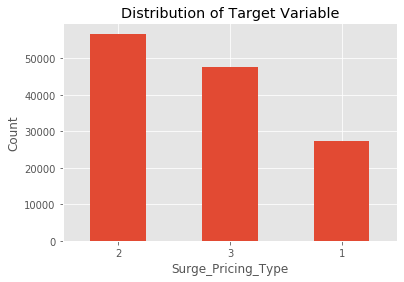

In [261]:
train['Surge_Pricing_Type'].value_counts(dropna=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.xlabel("Surge_Pricing_Type");
plt.ylabel("Count");
plt.title("Distribution of Target Variable");

### Independent Variable

#### Trip_Distance

In [262]:
train['Trip_Distance'].describe()

count    131662.000000
mean         44.200909
std          25.522882
min           0.310000
25%          24.580000
50%          38.200000
75%          60.730000
max         109.230000
Name: Trip_Distance, dtype: float64

1. The Mean Trip distance is 44.20 units.
2. Minimum seems to be 0.31 units which is too less and can be an anomaly.
3. Maximum is 109 units which should also be explored. 
4. The median value is 38 units. 

In [263]:
Q1 = train['Trip_Distance'].quantile(0.25)
Q3 = train['Trip_Distance'].quantile(0.35)
IQR = Q3-Q1
print ("Values below {} and Values above {} can be considered as outliers.".format(Q1-1.5*IQR,Q3+1.5*IQR))

Values below 15.759999999999994 and Values above 39.28 can be considered as outliers.


In [264]:
# Lets check how many records are below and above the outlier range
train[(train['Trip_Distance'] <= 15.75) | (train['Trip_Distance'] >= 39.29)]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131654,T0005908506,40.15,E,4.0,NaN,NaN,A,2.74625,1,NaN,49,63,Female,3
131657,T0005908509,11.72,D,1.0,2.74229,A,A,3.28500,0,61.0,47,76,Male,3
131658,T0005908510,74.81,C,7.0,2.81059,C,A,0.44500,0,NaN,63,88,Male,2
131659,T0005908512,40.17,C,10.0,2.99565,B,A,3.33625,0,NaN,48,75,Female,2


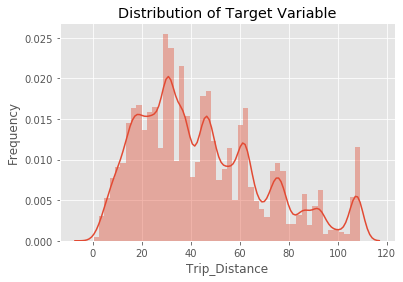

In [265]:
sns.distplot(train['Trip_Distance']);
plt.title("Distribution of Target Variable");
plt.ylabel("Frequency");
# Doesn't look like a normal distribution. 

#### Type_Of_Cab

In [266]:
train['Type_of_Cab'].value_counts(dropna=False)/len(train)

B      0.236484
C      0.213592
A      0.163821
NaN    0.153499
D      0.144241
E      0.088363
Name: Type_of_Cab, dtype: float64

In [267]:
# There are 15% missing values in this variable.
# B seems to be the popular Cab Type and E seems to be least popular.

#### Customer_Since_Months

In [268]:
train['Customer_Since_Months'].value_counts(dropna=False)

10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
NaN      5920
9.0      5147
Name: Customer_Since_Months, dtype: int64

1. 0.0 indicates they are new customers. 
2. Most of the customers have been with the cab aggregator for about 10 months (About 32% of customers).
3. There are missing values here as well. 

#### Life_Style_Index and Confidence_Life_Style_Index

Analyzing these two variables together as they seem to be missing together.

In [269]:
train[(train['Life_Style_Index'].isna()) & (train['Confidence_Life_Style_Index'].isna())]

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
5,T0005689469,19.06,E,10.0,NaN,NaN,A,2.59750,1,72.0,63,91,Male,3
8,T0005689473,106.80,C,3.0,NaN,NaN,A,3.14625,0,NaN,58,92,Male,2
37,T0005689517,93.78,NaN,4.0,NaN,NaN,A,3.33125,2,NaN,62,98,Female,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131623,T0005908452,37.91,B,10.0,NaN,NaN,A,2.18500,2,NaN,51,78,Male,2
131637,T0005908475,15.99,E,4.0,NaN,NaN,A,2.19250,3,61.0,45,78,Male,3
131646,T0005908490,20.20,E,10.0,NaN,NaN,B,1.26750,0,37.0,69,96,Male,1
131647,T0005908491,15.96,B,3.0,NaN,NaN,C,1.75500,1,NaN,50,67,Male,2


In [270]:
train['Life_Style_Index'].describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

1. Minimum value of Life_Style_Index is 1.59 and Maximum value is 4.87 with a mean of 2.80 and Median of 2.79.
2. Standard deviation is 0.22 and the distribution almost looks like a normal one. 
3. There are a lot of missing values here.

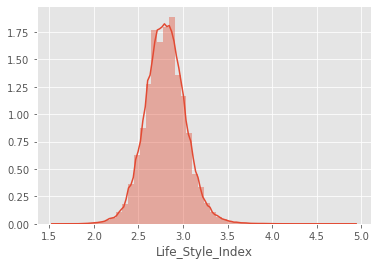

In [271]:
sns.distplot(train['Life_Style_Index'])
# Looks like a normal distribution.

In [272]:
train['Confidence_Life_Style_Index'].value_counts(dropna=False)
# By the looks of it a value A might mean a higher confidence in the Life_Style_Index and a value of C might mean low confidence

B      40355
C      35967
A      35147
NaN    20193
Name: Confidence_Life_Style_Index, dtype: int64

#### Destination_Type

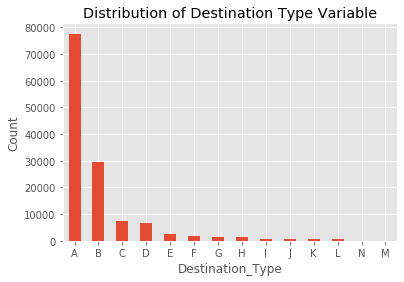

In [273]:
train['Destination_Type'].value_counts(dropna=False).plot(kind='bar');
plt.xticks(rotation=360);
plt.xlabel("Destination_Type");
plt.ylabel("Count");
plt.title("Distribution of Destination Type Variable");

1. A seems to be the most common destination type. No missing values here
2. M seems to be the least common destination type.

#### Customer_Rating

In [274]:
train['Customer_Rating'].isna().sum()
# No Missing values in the customer rating variable.

0

In [275]:
train['Customer_Rating'].describe()

count    131662.000000
mean          2.849458
std           0.980675
min           0.001250
25%           2.152500
50%           2.895000
75%           3.582500
max           5.000000
Name: Customer_Rating, dtype: float64

1. Looks like a normal distribution with a large std deviation.
2. Minimum value is almost 0 with maximum value being 5. 

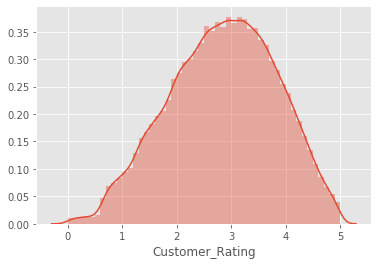

In [276]:
sns.distplot(train['Customer_Rating'])

#### Cancellation_Last_1Month

In [277]:
train['Cancellation_Last_1Month'].isna().sum()
# No Missing values in the Cancellation_Last_1Month variable.

0

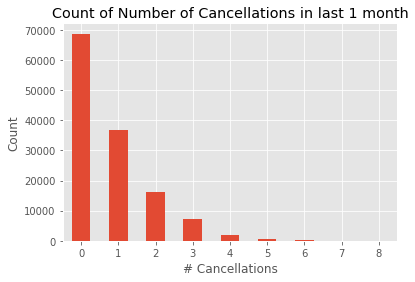

In [278]:
train['Cancellation_Last_1Month'].value_counts(dropna=False).plot(kind='bar')
plt.xticks(rotation=360);
plt.xlabel("# Cancellations");
plt.ylabel("Count");
plt.title("Count of Number of Cancellations in last 1 month");

1. Not many trips were cancelled by customers during the last month.

#### Var1, Var2, Var3

In [279]:
train['Var1'].isna().sum(),train['Var2'].isna().sum(),train['Var3'].isna().sum()

(71030, 0, 0)

In [280]:
train['Var1'].describe()

count    60632.000000
mean        64.202698
std         21.820447
min         30.000000
25%         46.000000
50%         61.000000
75%         80.000000
max        210.000000
Name: Var1, dtype: float64

In [281]:
train['Var2'].describe()

count    131662.000000
mean         51.202800
std           4.986142
min          40.000000
25%          48.000000
50%          50.000000
75%          54.000000
max         124.000000
Name: Var2, dtype: float64

In [282]:
train['Var3'].describe()

count    131662.000000
mean         75.099019
std          11.578278
min          52.000000
25%          67.000000
50%          74.000000
75%          82.000000
max         206.000000
Name: Var3, dtype: float64

1. Var1 has more than 50% missing values in both train and test data.
2. The distribution does not look normal.
3. The Distribution of Var2 and Var3 variables almost looks normal.
4. Var3 has a maximum value of 204 which needs to be explored.

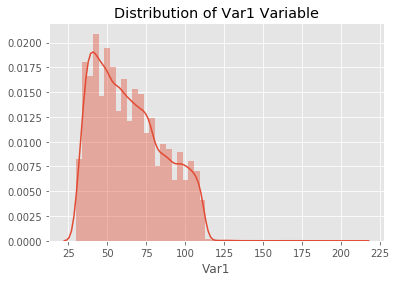

In [283]:
sns.distplot(train['Var1']);
plt.title("Distribution of Var1 Variable");

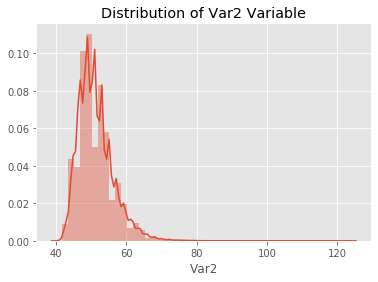

In [284]:
sns.distplot(train['Var2']);
plt.title("Distribution of Var2 Variable");

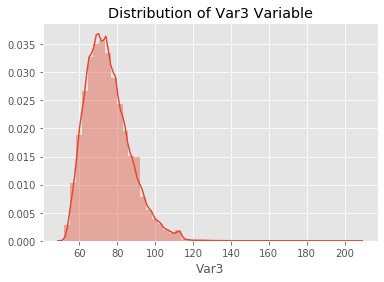

In [285]:
sns.distplot(train['Var3']);
plt.title("Distribution of Var3 Variable");

In [286]:
cols = ['Var1','Var2','Var3']
for col in cols:
    Q1= train[col].quantile(0.25)
    Q3= train[col].quantile(0.75)
    IQR = (Q3) - (Q1)
    LowerRange = (Q1) - 1.5*(IQR)
    UpperRange = (Q3) + 1.5*(IQR)
    print ("For {}, Values below {} and Values above {} can be considered as outliers.".format(col,LowerRange,UpperRange))

For Var1, Values below -5.0 and Values above 131.0 can be considered as outliers.
For Var2, Values below 39.0 and Values above 63.0 can be considered as outliers.
For Var3, Values below 44.5 and Values above 104.5 can be considered as outliers.


#### Gender

In [287]:
train['Gender'].isna().sum()

0

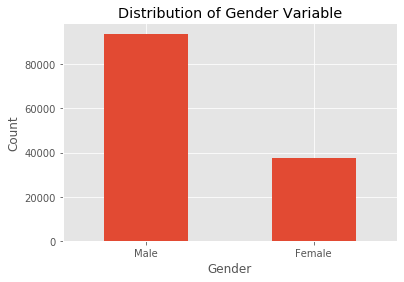

In [288]:
train['Gender'].value_counts().plot(kind='bar');
plt.xticks(rotation=360);
plt.xlabel("Gender");
plt.ylabel("Count");
plt.title("Distribution of Gender Variable");

### Bi-Variate Analysis

In [289]:
train.groupby("Type_of_Cab")['Trip_Distance'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Type_of_Cab,,,,,,
A,21569,1.53,109.23,43.847848,38.330,24.660934
B,31136,0.31,109.23,41.627295,36.575,23.540387
C,28122,1.55,109.23,43.635090,37.560,25.585164
D,18991,1.54,109.23,46.139080,40.930,27.188193
E,11634,1.77,109.23,49.996106,46.155,28.088998


1. We can see that the minimum value of B Cab Type is way below the others, and this can be an anomaly/outlier.
2. The maximum value for all the cab types is the same which is surprising.
3. Average value of B Cab type is below the others may be because of large count.
4. Mean and Median values of E Cab type is highest and this may be because of low count of E Cab Type.

In [290]:
train.groupby("Destination_Type")['Trip_Distance'].agg(['count','min','max','mean','median','std'])

,count,min,max,mean,median,std
Destination_Type,,,,,,
A,77597,1.56,109.23,46.635770,42.800,25.095947
B,29555,1.53,109.23,45.517439,39.990,24.774040
C,7484,1.60,109.23,42.962588,36.100,27.323024
D,6588,0.31,109.22,29.641900,23.130,23.017592
E,2717,1.59,109.23,32.003544,24.580,24.544359
F,1950,2.41,109.19,46.445538,38.910,28.540257
G,1489,1.68,108.89,25.405561,20.290,17.322389
H,1260,1.73,109.05,27.206849,20.475,21.149759
I,813,2.30,107.02,22.498647,16.670,17.586359


1. Maximum distance for each Destination_Type is the same.

### Missing Value Treatment, Feature Generation ....

In [291]:
# Distance Binning
def distance_binning(x):
    if x<=30:
        return "Low"
    elif (x>30 and x<=60):
        return "Medium"
    elif (x>60 and x<=90):
        return "High"
    else:
        return "Very_High"

train['Distance_Bin'] = train['Trip_Distance'].apply(distance_binning)
test['Distance_Bin'] = test['Trip_Distance'].apply(distance_binning)

In [292]:
cols = [col for col in train.columns if train[col].isna().sum()>0]
for col in cols:
    # Creating Missing Value Indicators for Columns with Missing Values
    train[col+"_isNA"] = train[col].isna()
    test[col+"_isNA"] = test[col].isna()

In [293]:
"""# Filling missing values

train['Type_of_Cab'].fillna(train['Type_of_Cab'].value_counts(dropna=False).index[0],inplace=True)
test['Type_of_Cab'].fillna(test['Type_of_Cab'].value_counts(dropna=False).index[0],inplace=True)

train['Life_Style_Index'].fillna(0,inplace=True)
test['Life_Style_Index'].fillna(0,inplace=True)

train['Confidence_Life_Style_Index'].fillna("Missing",inplace=True)
test['Confidence_Life_Style_Index'].fillna("Missing",inplace=True)

train['Customer_Since_Months'].fillna("Missing",inplace=True)
test['Customer_Since_Months'].fillna("Missing",inplace=True)

train['Var1'].fillna(0,inplace=True)
test['Var1'].fillna(0,inplace=True)"""

'# Filling missing values\n\ntrain[\'Type_of_Cab\'].fillna(train[\'Type_of_Cab\'].value_counts(dropna=False).index[0],inplace=True)\ntest[\'Type_of_Cab\'].fillna(test[\'Type_of_Cab\'].value_counts(dropna=False).index[0],inplace=True)\n\ntrain[\'Life_Style_Index\'].fillna(0,inplace=True)\ntest[\'Life_Style_Index\'].fillna(0,inplace=True)\n\ntrain[\'Confidence_Life_Style_Index\'].fillna("Missing",inplace=True)\ntest[\'Confidence_Life_Style_Index\'].fillna("Missing",inplace=True)\n\ntrain[\'Customer_Since_Months\'].fillna("Missing",inplace=True)\ntest[\'Customer_Since_Months\'].fillna("Missing",inplace=True)\n\ntrain[\'Var1\'].fillna(0,inplace=True)\ntest[\'Var1\'].fillna(0,inplace=True)'

In [294]:
agg_func = {
    'Trip_Distance': ['mean','median','std']    
}
agg_func = train.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Type_of_Cab'], how='left')

agg_func = {
    'Trip_Distance': ['mean','median','std']    
}
agg_func = test.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Type_of_Cab'], how='left')

In [295]:
agg_func = {
    'Life_Style_Index': ['mean','median','std']    
}
agg_func = train.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Type_of_Cab'], how='left')

agg_func = {
    'Life_Style_Index': ['mean','median','std']    
}
agg_func = test.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Type_of_Cab'], how='left')

In [296]:
agg_func = {
    'Customer_Rating': ['mean','median','std']    
}
agg_func = train.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Type_of_Cab'], how='left')

agg_func = {
    'Customer_Rating': ['mean','median','std']    
}
agg_func = test.groupby('Type_of_Cab').agg(agg_func)
agg_func.columns = [ 'Type_of_Cab_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Type_of_Cab'], how='left')

In [297]:
agg_func = {
    'Trip_Distance': ['mean','median','std']    
}
agg_func = train.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Destination_Type'], how='left')

agg_func = {
    'Trip_Distance': ['mean','median','std']    
}
agg_func = test.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Destination_Type'], how='left')

In [298]:
agg_func = {
    'Life_Style_Index': ['mean','median','std']    
}
agg_func = train.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Destination_Type'], how='left')

agg_func = {
    'Life_Style_Index': ['mean','median','std']    
}
agg_func = test.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Destination_Type'], how='left')

In [299]:
agg_func = {
    'Customer_Rating': ['mean','median','std']    
}
agg_func = train.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
train = train.merge(agg_func, on=['Destination_Type'], how='left')

agg_func = {
    'Customer_Rating': ['mean','median','std']    
}
agg_func = test.groupby('Destination_Type').agg(agg_func)
agg_func.columns = [ 'Destination_Type_' + ('_'.join(col).strip()) for col in agg_func.columns.values]
agg_func.reset_index(inplace=True)
test = test.merge(agg_func, on=['Destination_Type'], how='left')

In [300]:
train.drop("Trip_ID",axis=1,inplace=True)

In [301]:
# Converting Categorical Data Type Variables to Category data type
cols = ['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index','Destination_Type','Cancellation_Last_1Month','Gender','Distance_Bin']
for col in cols:
    train[col] = train[col].astype('category')
    train[col] = train[col].cat.codes+1
    
    test[col] = test[col].astype('category')
    test[col] = test[col].cat.codes+1

In [302]:
train.shape, test.shape

((131662, 37), (87395, 36))

In [303]:
cols = ['Trip_Distance','Life_Style_Index','Var1','Var2','Var3']
for col in cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

In [304]:
y = train['Surge_Pricing_Type']
X = train[[col for col in train.columns if col!="Surge_Pricing_Type"]]

In [305]:
kf = KFold(n_splits=5,shuffle=False,random_state=42)

C:\Users\kulka\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [306]:
clf = lgb.LGBMClassifier(boosting_type='gbdt',objective='multiclass',num_class=3,random_state=42,n_jobs=-1,verbose=1,)
params = {"max_depth":[4,6,8,10,-1],
          "learning_rate":[0.001,0.005,0.01,0.05,0.1,0.3],
          "subsample":[0.5,0.6,0.7,0.8,0.9],
          "colsample_bytree":[0.5,0.6,0.7,0.8,0.9],
          "reg_alpha":[0,0.25,0.5,1,2],
          "reg_lambda":[0,0.25,0.5,1,2],
          "num_leaves":[7,15,31,63,127],
          "min_data_in_leaf":[1,3,5,7,10,25],
          "n_estimators":list(range(50,1001,50))}
random_search = RandomizedSearchCV(estimator=clf,param_distributions=params,cv=kf.split(X,y),scoring='accuracy')
random_search.fit(X,y)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001B7CF752F48>,
                   error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_class=3, num_leaves=31,
                                            ob...
                                        'min_data_in_leaf': [1, 3, 5, 7, 10,
                                                             25],
      

In [307]:
random_search.best_estimator_,random_search.best_params_,random_search.best_score_

(LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
                importance_type='split', learning_rate=0.01, max_depth=10,
                min_child_samples=20, min_child_weight=0.001,
                min_data_in_leaf=25, min_split_gain=0.0, n_estimators=950,
                n_jobs=-1, num_class=3, num_leaves=127, objective='multiclass',
                random_state=42, reg_alpha=0, reg_lambda=0.5, silent=True,
                subsample=0.6, subsample_for_bin=200000, subsample_freq=0,
                verbose=1),
 {'subsample': 0.6,
  'reg_lambda': 0.5,
  'reg_alpha': 0,
  'num_leaves': 127,
  'n_estimators': 950,
  'min_data_in_leaf': 25,
  'max_depth': 10,
  'learning_rate': 0.01,
  'colsample_bytree': 0.7},
 0.7055566459626548)

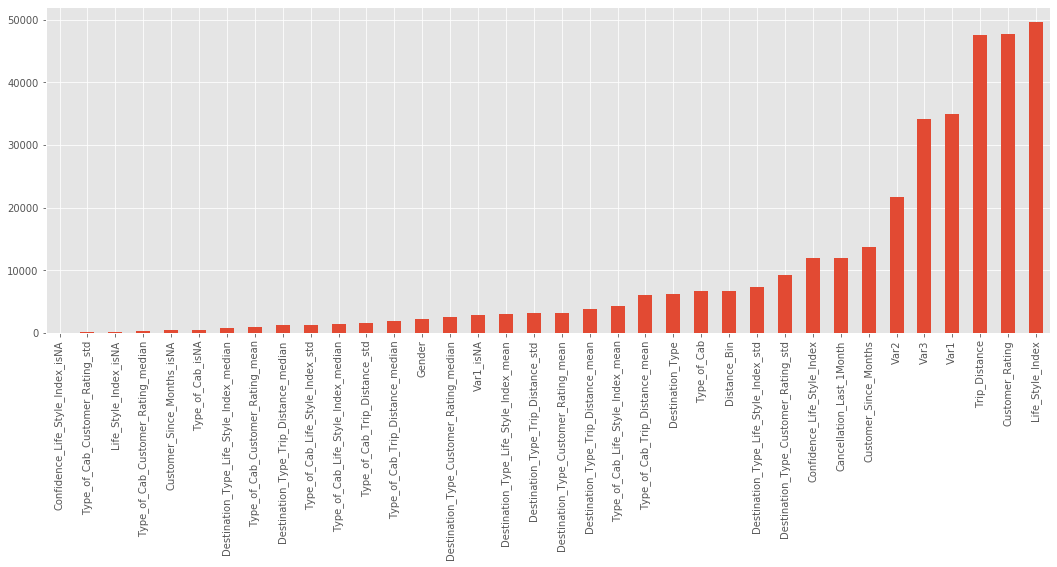

In [308]:
plt.figure(figsize=(18,6))
ser = pd.Series(random_search.best_estimator_.feature_importances_,X.columns).sort_values()
ser.plot(kind='bar')

In [309]:
#Submission['Surge_Pricing_Type'] = random_search.best_estimator_.predict(test)
#Submission.to_csv("Sub_14.csv",index=None)